In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [5]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
# test dataset does not contain target column -- Survived

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# missing values for Age, Cabin, and Embarked columns

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# min Age is 0.42

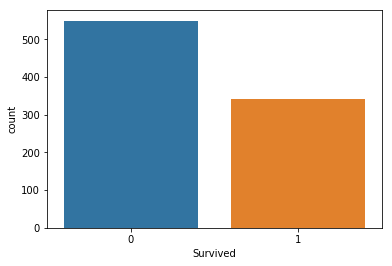

In [24]:
# bar plot of Survived feature
sns.countplot(x='Survived', data=train_df)

In [25]:
# less people survived than that died

In [26]:
# build a model that predicts that nobody survives

In [27]:
# Add Survived column to test dataset and set all values to be equivalent to 'did not survive'
test_df['Survived'] = 0
test_df[['PassengerId', 'Survived']].to_csv('predictions/no_survivors.csv', index=False)

In [28]:
!ls predictions/

no_survivors.csv


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [30]:
# submitted predictions to Kaggle
# Score: 0.62679 accuracy
# Note: will need to use other metrics besides accuracy

In [31]:
# REITERATE: more exploratory data analysis

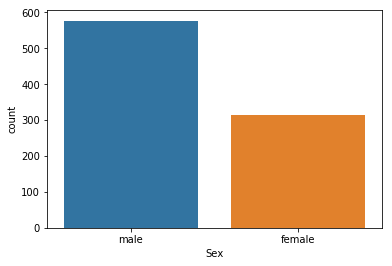

In [32]:
# bar plot of Sex feature
sns.countplot(x='Sex', data=train_df)

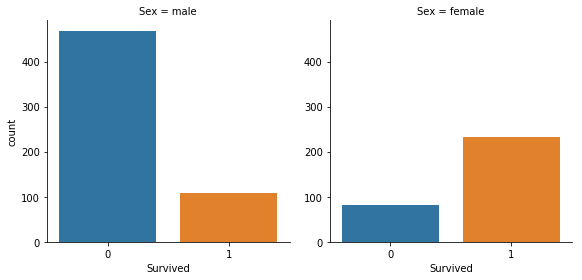

In [35]:
# bar plot of Survived column split over column Sex
sns.factorplot(x='Survived', col='Sex', kind='count', data=train_df)

In [36]:
# more females survived than males

In [38]:
# count survivors grouped by sex
train_df.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [40]:
# figure out proportion of women and of men that survived
print(train_df[train_df.Sex == 'female'].Survived.sum() / train_df[train_df.Sex == 'female'].Survived.count())
print(train_df[train_df.Sex == 'male'].Survived.sum() / train_df[train_df.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


In [45]:
# create model where all women survive
test_df['Survived'] = test_df.Sex == 'female'
test_df['Survived'] = test_df.Survived.apply(lambda x: int(x))

In [47]:
test_df[['PassengerId', 'Survived']].to_csv('predictions/women_only_survivors.csv', index=False)

In [ ]:
# submitted predictions to Kaggle
# Score: --- accuracy
# Note: will need to use other metrics besides accuracy

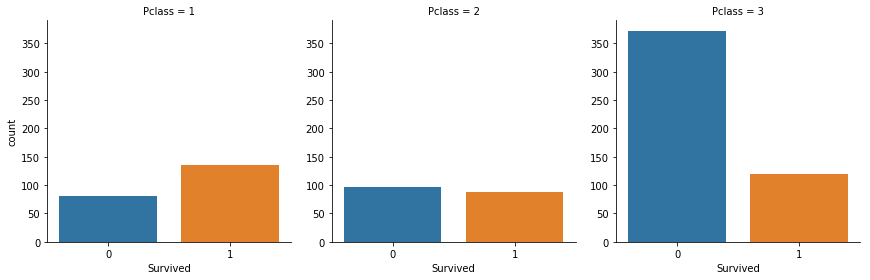

In [48]:
# bar plot of Survived feature split over the feature Pclass
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train_df)

In [49]:
# passengers from first class had a lot better survival rate

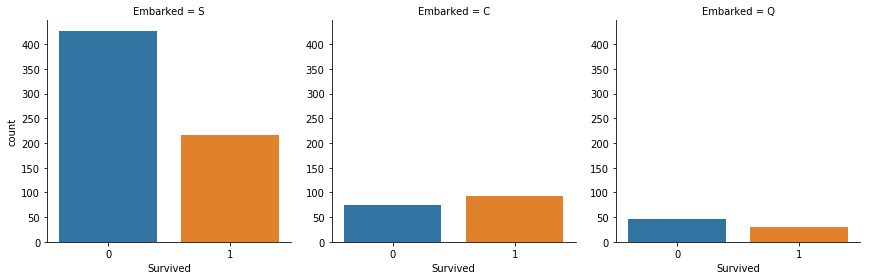

In [51]:
# bar plot of Survived feature split over Embarked feature
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train_df)

In [53]:
# passengers that embarked out of Southampton were a lot less likely survive

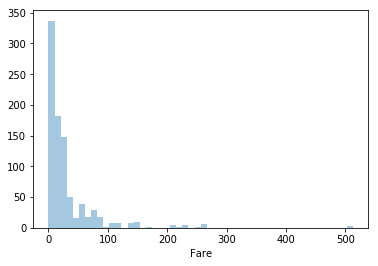

In [54]:
# plot histogram of Fare feature
sns.distplot(train_df.Fare, kde=False)

In [55]:
# most passengers paid less than 100 for Fare

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

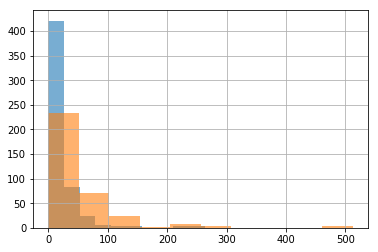

In [56]:
# plot Fare for each value of Survived feature on the same plot
train_df.groupby('Survived').Fare.hist(alpha=0.6)

In [57]:
# passengers that paid a higher fare were more likely to survive

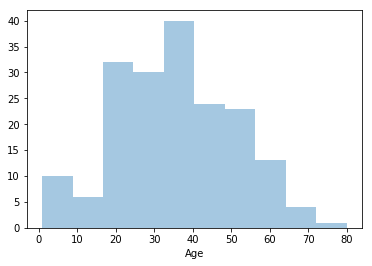

In [58]:
# histogram of Age feature, drop null values before plotting
train_df_dropna = train_df.dropna()
sns.distplot(train_df_dropna.Age, kde=False)

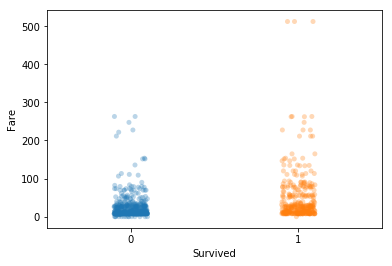

In [59]:
# strip plot of Fare with Survived on the x axis
sns.stripplot(x='Survived', y='Fare', data=train_df, alpha=0.3, jitter=True)

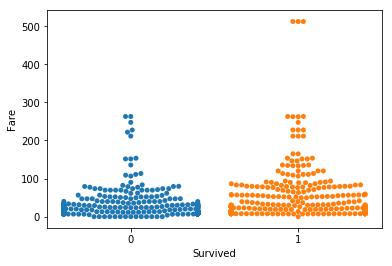

In [60]:
# swarm plot of Fare with Survived on the x axis
sns.swarmplot(x='Survived', y='Fare', data=train_df)

In [61]:
# Fare is correlated with survival

In [62]:
# use descrive to show statistics as a function of survival
train_df.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [ ]:
# scatter plot of Age against Fare colored by Survived
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_df, fit_reg=False, scatter_kws={'alpha': 0.5})

In [65]:
# young passengers and passengers that paid higher fares were more of the survivors

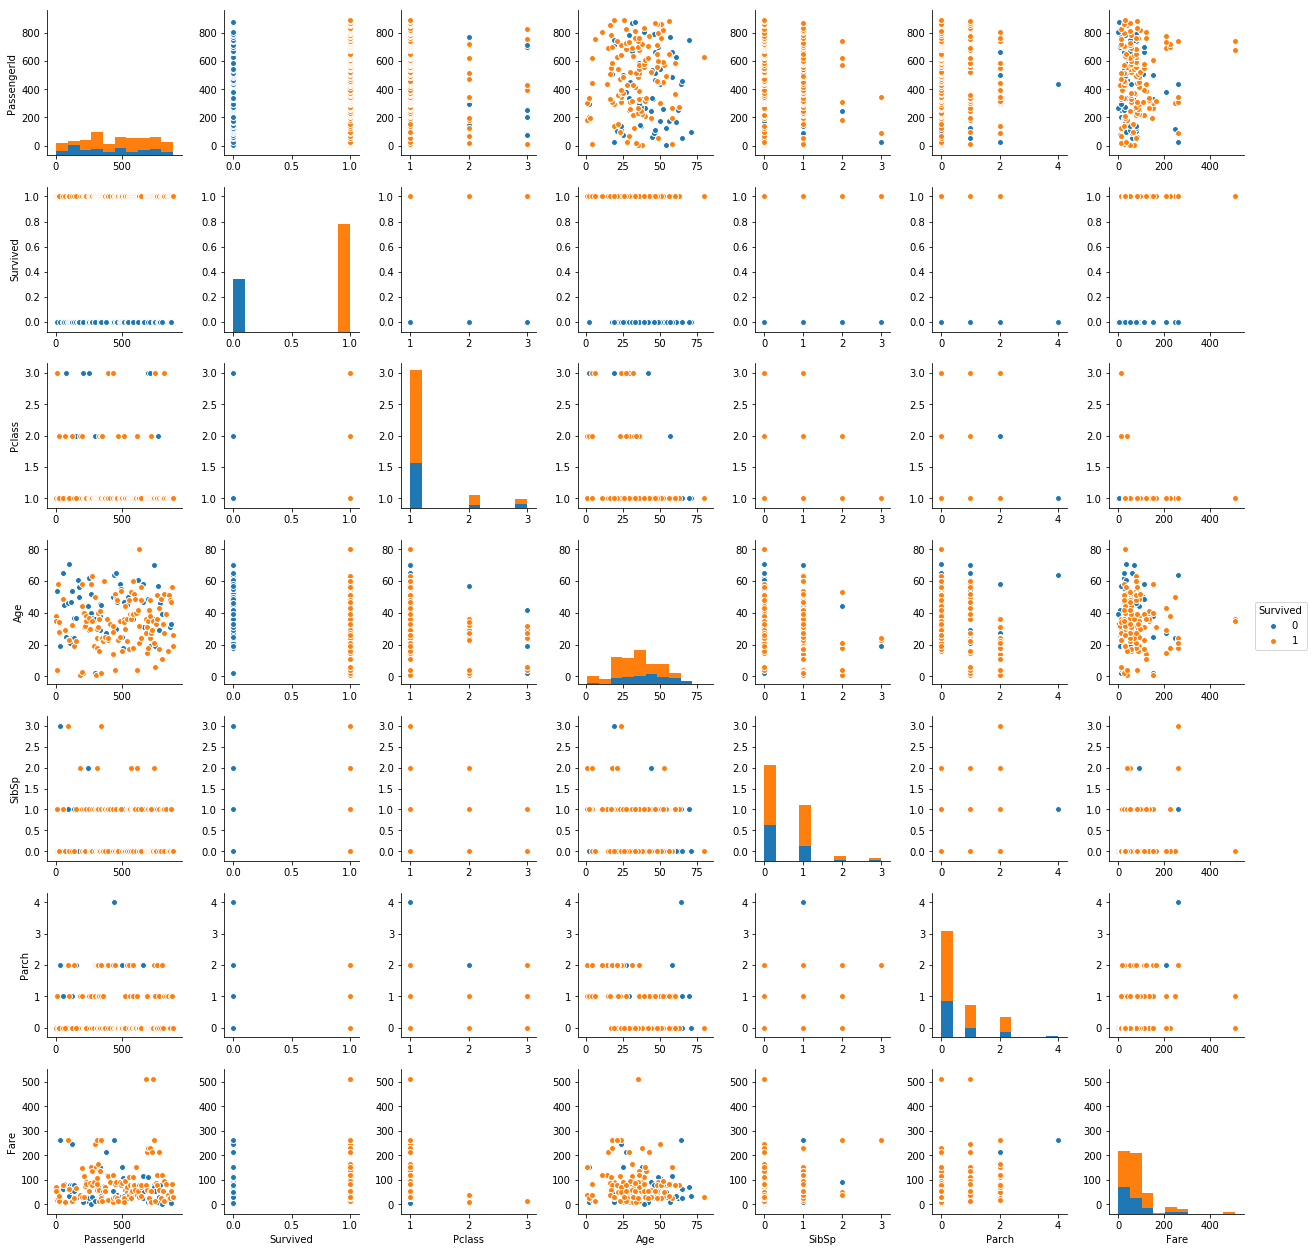

In [66]:
# pair plot based on Survived feature
sns.pairplot(train_df_dropna, hue='Survived')